# Project: Basketball

Author: Minh Bui
<br>
Class: CSCI 3022

Source: https://www.kaggle.com/datasets/ionaskel/nba-games-stats-from-2014-to-2018?resource=download

## The 3 Point Revolution

My multivariate analysis problem involves 3 point shooting in the NBA and how it impacts winning percentage.  This problem is of great interest to me because I love basketball, and I feel that 3 pointers have changed the way the game is played.  The problem is a regression task, as I hope to use 3 point shooting statistics as a predictive measure of wins and losses in the NBA.  I took data from the NBA seasons between 2014-2018 because these years represented the Golden State Warriors dynasty.  The link to my data source is provided above and it details basketball statistics for every NBA team during the designated timeframe.  The dataset contains 41 columns designating different statistical categories.  The total number of rows is 9840 which represents the total amount of games played during our timeline.  30 teams times 82 games multiplied by 4 seasons equals 9840 rows of data.

In [153]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import math

In [154]:
nba = pd.read_csv('nba.games.stats.csv')
nba

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,10/29/2014,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,11/1/2014,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,11/5/2014,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,11/7/2014,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,11/8/2014,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,78119,WAS,78,4/3/2018,Away,HOU,L,104,120,38,...,18,27,0.667,10,46,26,13,3,9,14
9836,79119,WAS,79,4/5/2018,Away,CLE,L,115,119,47,...,22,28,0.786,5,35,26,10,3,16,14
9837,80119,WAS,80,4/6/2018,Home,ATL,L,97,103,35,...,16,23,0.696,7,50,24,5,5,18,22
9838,81124,WAS,81,4/10/2018,Home,BOS,W,113,101,41,...,22,27,0.815,13,44,22,14,1,16,18


## Season by Season Analysis

The success of teams like the Golden State Warriors caused franchises accross the entire league to place a greater emphasis on 3 point shooting.  Every year from 2014-2018 saw increases in every 3 point statistic throughout the whole NBA.  The table below shows that each season saw a league wide increase in total 3 point makes, attempts, and shooting percentage.

In [155]:
season_length = nba.shape[0] / 4
seasons = []

for i in range(4):
    seasons.append(nba.loc[season_length * i: season_length * (i + 1) - 1])
    
'''
season[0] = 2014-2015 Season
season[1] = 2015-2016 Season
season[2] = 2016-2017 Season
season[3] = 2017-2018 Season
'''

'\nseason[0] = 2014-2015 Season\nseason[1] = 2015-2016 Season\nseason[2] = 2016-2017 Season\nseason[3] = 2017-2018 Season\n'

In [156]:
yearlyMakes = []
yearlyAtt = []
yearlyPerc = []

for year in seasons:
    makes = year['X3PointShots'].sum()
    attempts = year['X3PointShotsAttempted'].sum()
    percentage = makes / attempts * 100
    
    yearlyMakes.append(makes)
    yearlyAtt.append(attempts)
    yearlyPerc.append(percentage)

In [157]:
seasonDB = pd.DataFrame()

seasonDB['Season'] = [
    '2014-2015',
    '2015-2016',
    '2016-2017',
    '2017-2018'
]

seasonDB['3 Point Makes'] = yearlyMakes
seasonDB['3 Point Attempts'] = yearlyAtt
seasonDB['3 Point Percentage'] = yearlyPerc

seasonDB

,Season,3 Point Makes,3 Point Attempts,3 Point Percentage
0,2014-2015,19300,55137,35.003718
1,2015-2016,20953,59241,35.369086
2,2016-2017,23748,66422,35.753214
3,2017-2018,25807,71337,36.176178


## Data Cleanup

The original dataset includes several columns that do not pertain to game stats, such as Date, Home, and Opponent, so I excluded them from my database.  I cleaned up the data by creating a new dataframe from all the relevant statistics in the original database.  I did this by grouping the data by team name and transforming every win into a 1 and all losses into 0.  By summing up the win/loss column, I got the win total for every team from 2014-2018.  Win rate is calculated as team wins divided by total games played.  Percentage values (Field Goals, 3 Pointers, and Free Throws) were all calculated as Shots Made divided by Shots Attempted.  Defensive rebounding was not included in the original data, so I calculated it as Total Rebounds minus Offensive Rebounds.

In [158]:
nba.insert(7, 'Wins', nba['WINorLOSS'].eq('W'))
nba['Wins'] = nba['Wins'].astype(int)
#nba['Wins']

In [159]:
columns = list(nba)
del columns[:7]

removed_col = [
    'FieldGoals.', 
    'X3PointShots.', 
    'FreeThrows.', 
    'Opp.FieldGoals.',
    'Opp.3PointShots.',
    'Opp.FreeThrows.'
]

for col in removed_col:
    columns.remove(col)

#columns

In [160]:
teams = nba.groupby(['Team'])
stats = []

for col in columns:
    stats.append(teams[col].sum())

#stats

In [161]:
dfNBA = pd.DataFrame()

for i in range(len(stats)):
    dfNBA[columns[i]] = stats[i]

#dfNBA.head()

In [162]:
total = nba['Team'].value_counts()
losses = total - dfNBA['Wins']
winRate = dfNBA['Wins'] / total

dfNBA.insert(1, 'Losses', losses)
dfNBA.insert(2, 'Winning Percentage', winRate * 100)

#dfNBA.head()

In [163]:
fgPerc = dfNBA['FieldGoals'] / dfNBA['FieldGoalsAttempted']
dfNBA.insert(7, 'Field Goal Percentage', fgPerc * 100)

perc3pt = dfNBA['X3PointShots'] / dfNBA['X3PointShotsAttempted']
dfNBA.insert(10, '3 Point Percentage', perc3pt * 100)

ftPerc = dfNBA['FreeThrows'] / dfNBA['FreeThrowsAttempted']
dfNBA.insert(13, 'Free Throw Percentage', ftPerc * 100)

defReb = dfNBA['TotalRebounds'] - dfNBA['OffRebounds']
dfNBA.insert(15, 'DefRebounds', defReb)

#dfNBA.head()

In [164]:
fgPercOpp = dfNBA['Opp.FieldGoals'] / dfNBA['Opp.FieldGoalsAttempted']
dfNBA.insert(24, 'Opp Field Goal Percentage', fgPercOpp * 100)

perc3ptOpp = dfNBA['Opp.3PointShots'] / dfNBA['Opp.3PointShotsAttempted']
dfNBA.insert(27, 'Opp 3 Point Percentage', perc3ptOpp * 100)

ftPercOpp = dfNBA['Opp.FreeThrows'] / dfNBA['Opp.FreeThrowsAttempted']
dfNBA.insert(30, 'Opp Free Throw Percentage', ftPercOpp * 100)

defRebOpp = dfNBA['Opp.TotalRebounds'] - dfNBA['Opp.OffRebounds']
dfNBA.insert(32, 'Opp.DefRebounds', defRebOpp)

#dfNBA.to_csv('Basketball.csv')
dfNBA

,Wins,Losses,Winning Percentage,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,Field Goal Percentage,X3PointShots,X3PointShotsAttempted,...,Opp.FreeThrowsAttempted,Opp Free Throw Percentage,Opp.OffRebounds,Opp.DefRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
Team,,,,,,,,,,,,,,,,,,,,,
ATL,175,153,53.353659,33776,33552,12542,27554,45.517892,3279,9159,...,6806,76.535410,3609,11007,14616,7794,2758,1692,4938,6540
BOS,196,132,59.756098,34367,33581,12718,28482,44.652763,3301,9397,...,7835,76.056158,3499,11183,14682,7108,2422,1670,4702,6498
BRK,107,221,32.621951,33541,35239,12443,27825,44.718778,2990,8656,...,7326,75.853126,3532,11364,14896,7620,2773,1709,4217,6437
CHI,160,168,48.780488,33475,33892,12505,28394,44.040995,2825,7959,...,6751,76.018368,3466,11147,14613,7567,2459,1710,4004,6238
CHO,153,175,46.646341,33675,33675,12239,27960,43.773247,3019,8556,...,6398,77.743045,2878,11628,14506,7757,2135,1742,4148,6849
CLE,211,117,64.329268,35150,33954,12846,27540,46.644880,3754,10096,...,6716,75.387135,3359,10581,13940,7876,2443,1419,4141,6761
DAL,149,179,45.426829,33435,33711,12415,27726,44.777465,3383,9585,...,7334,75.470412,3326,11614,14940,7302,2349,1324,4657,6769
DEN,149,179,45.426829,34856,35238,12907,28457,45.356151,3126,8876,...,7631,75.743677,3268,10687,13955,7819,2606,1816,4237,6762
DET,152,176,46.341463,33256,33392,12629,28536,44.256378,2960,8479,...,6700,77.761194,3014,11197,14211,7708,2303,1494,4313,6302


## Exploratory Data Analysis

My exploratory data analysis prints graphs of every team’s win/loss record, 3 point makes vs attempts, and 3 point shooting percentage vs winning percentage.  The teams of greatest interest are GSW, CLE, SAS, and HOU.  The Warriors won 3 of the 4 championships during the 2014-2018 timeline, and they did it by shooting a higher 3 point percentage than any other team in the NBA.  Cleveland was the only team to beat Golden State in the NBA Finals, and the Cavaliers had the second highest recorded 3 point shooting rate.  The San Antonio Spurs yielded the second best regular season winning percentage behind Golden State, and the Spurs had the third best 3 point shooting percentage.  Houston was the only team that shot and made more 3 pointers than the Warriors, but their shooting percentage was lower so their Win/Loss record was inferior.

[Text(0, 0.5, 'Win Loss Record')]

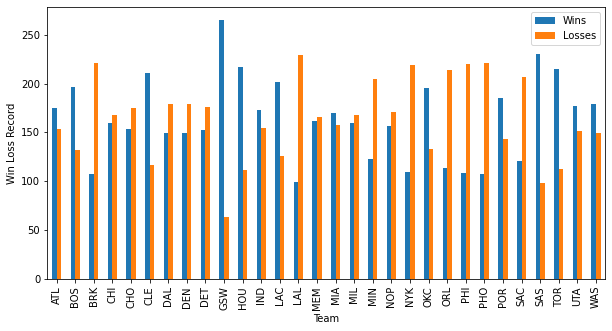

In [165]:
dfNBA[['Wins', 'Losses']].plot(kind='bar', figsize=(10, 5)).set(ylabel = 'Win Loss Record')

[Text(0, 0.5, '3 Point Shooting')]

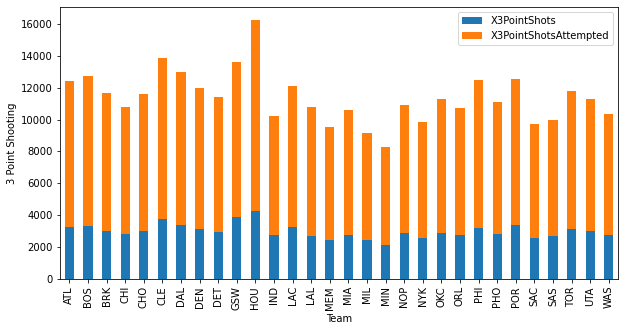

In [166]:
dfNBA[['X3PointShots', 'X3PointShotsAttempted']].plot(kind='bar', stacked=True, figsize=(10, 5)).set(ylabel = '3 Point Shooting')

[Text(0, 0.5, '3 Pointer Winning Percentage')]

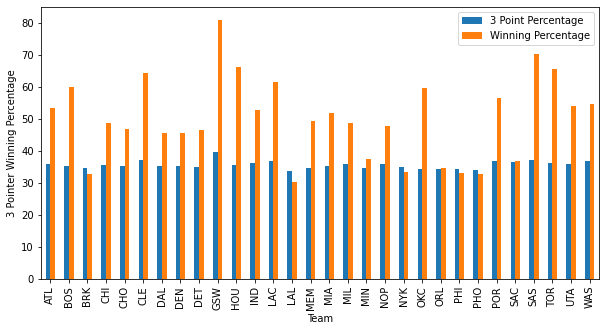

In [167]:
dfNBA[['3 Point Percentage', 'Winning Percentage']].plot(kind='bar', figsize=(10, 5)).set(ylabel = '3 Pointer Winning Percentage')

## Statistical Correlations

Below are correlation matrices, a heatmap, and scatter plots that all demonstrate the correlations between Win Rate and every statistical category in the database.  The first correlation matrix is sorted by highest correlation value in relation to Win Total.  The second matrix is sorted in the same order, but with absolute values for all negative correlations.  This allows us to gauge the importance of defensive stats, such as Opponents' Points Scored and Shooting Percentage.

The results of these correlation matrices shows that 3 Point Percentage has the strongest correlative relationship with winning.  The second matrix shows that the second strongest correlation is a defensive stat: Opponent's Field Goal Percentage.  This is followed closely by Team Points and your own Field Goal Percentage.  All of this makes sense, because limiting the other team's shooting rate while scoring a lot of points yourself, will obviously lead to victory.  3 Point Percentage yielded an even higher correlation score than these vital stats, which means accurate 3 Point Shooting gives you the best chance to win.

A heatmap display visualizes the correlation between every combination of stats in the entire database.  Scatter plots show the correlation between Winning Percentage and all other stats, besides Wins and Losses.  You can see from these graphs that 3 Point Shooting Percentage yields the straightest, most linearly positive relationship with Win Rate.

In [168]:
corr_matrix = dfNBA.corr()
corr_matrix.sort_values('Wins', ascending=False)

,Wins,Losses,Winning Percentage,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,Field Goal Percentage,X3PointShots,X3PointShotsAttempted,...,Opp.FreeThrowsAttempted,Opp Free Throw Percentage,Opp.OffRebounds,Opp.DefRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
Wins,1.000000,-1.000000,1.000000,0.691027,-0.565639,0.570585,-0.095035,0.684257,0.561220,0.409296,...,-0.225099,-0.194457,0.029355,-0.473609,-0.423268,-0.324153,-0.159301,-0.592072,0.167893,0.140859
Winning Percentage,1.000000,-1.000000,1.000000,0.691027,-0.565639,0.570585,-0.095035,0.684257,0.561220,0.409296,...,-0.225099,-0.194457,0.029355,-0.473609,-0.423268,-0.324153,-0.159301,-0.592072,0.167893,0.140859
3 Point Percentage,0.754672,-0.754672,0.754672,0.589553,-0.350005,0.648228,-0.142433,0.801842,0.420408,0.191244,...,-0.217984,-0.119423,0.143837,-0.325516,-0.237459,-0.171677,-0.013449,-0.628403,0.054108,-0.043735
TeamPoints,0.691027,-0.691027,0.691027,1.000000,0.186763,0.819945,0.343632,0.630503,0.661946,0.554178,...,0.038455,-0.233921,0.370232,-0.259198,-0.078547,0.164868,0.176845,-0.336940,0.143873,0.291174
Field Goal Percentage,0.684257,-0.684257,0.684257,0.630503,-0.219118,0.752218,-0.256119,1.000000,0.200858,0.002152,...,-0.034911,-0.196300,0.284400,-0.598998,-0.428436,-0.114705,0.121763,-0.637723,0.284974,0.109980
FieldGoals,0.570585,-0.570585,0.570585,0.819945,0.154907,1.000000,0.444126,0.752218,0.306629,0.153644,...,0.066791,-0.144298,0.371910,-0.257976,-0.076697,0.121690,0.162395,-0.452588,0.109725,-0.075227
X3PointShots,0.561220,-0.561220,0.561220,0.661946,-0.005789,0.306629,0.171364,0.200858,1.000000,0.970569,...,-0.075422,-0.226900,0.236875,0.107432,0.201288,0.061270,0.170840,-0.289536,0.069988,0.143679
Assists,0.457186,-0.457186,0.457186,0.566166,0.042261,0.692001,0.167380,0.619797,0.340678,0.199201,...,-0.037868,-0.032597,0.483946,-0.081871,0.133839,0.219038,0.311478,-0.303687,0.414476,-0.162881
X3PointShotsAttempted,0.409296,-0.409296,0.409296,0.554178,0.077710,0.153644,0.217699,0.002152,0.970569,1.000000,...,-0.027933,-0.212373,0.210031,0.206205,0.280605,0.107269,0.187422,-0.145830,0.064963,0.169482
DefRebounds,0.404156,-0.404156,0.404156,0.443745,-0.074502,0.435397,0.522841,0.083554,0.468453,0.400741,...,-0.269584,0.075303,-0.084169,0.225930,0.171584,-0.053752,0.000726,-0.207547,-0.439978,-0.221448


In [169]:
corr_abs = corr_matrix.abs()
corr_abs.sort_values('Wins', ascending=False)

,Wins,Losses,Winning Percentage,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,Field Goal Percentage,X3PointShots,X3PointShotsAttempted,...,Opp.FreeThrowsAttempted,Opp Free Throw Percentage,Opp.OffRebounds,Opp.DefRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
Wins,1.000000,1.000000,1.000000,0.691027,0.565639,0.570585,0.095035,0.684257,0.561220,0.409296,...,0.225099,0.194457,0.029355,0.473609,0.423268,0.324153,0.159301,0.592072,0.167893,0.140859
Losses,1.000000,1.000000,1.000000,0.691027,0.565639,0.570585,0.095035,0.684257,0.561220,0.409296,...,0.225099,0.194457,0.029355,0.473609,0.423268,0.324153,0.159301,0.592072,0.167893,0.140859
Winning Percentage,1.000000,1.000000,1.000000,0.691027,0.565639,0.570585,0.095035,0.684257,0.561220,0.409296,...,0.225099,0.194457,0.029355,0.473609,0.423268,0.324153,0.159301,0.592072,0.167893,0.140859
3 Point Percentage,0.754672,0.754672,0.754672,0.589553,0.350005,0.648228,0.142433,0.801842,0.420408,0.191244,...,0.217984,0.119423,0.143837,0.325516,0.237459,0.171677,0.013449,0.628403,0.054108,0.043735
Opp Field Goal Percentage,0.704546,0.704546,0.704546,0.218866,0.690487,0.227827,0.143874,0.348015,0.334925,0.218467,...,0.031093,0.038857,0.077487,0.223152,0.171915,0.555041,0.057676,0.479263,0.111945,0.155290
TeamPoints,0.691027,0.691027,0.691027,1.000000,0.186763,0.819945,0.343632,0.630503,0.661946,0.554178,...,0.038455,0.233921,0.370232,0.259198,0.078547,0.164868,0.176845,0.336940,0.143873,0.291174
Field Goal Percentage,0.684257,0.684257,0.684257,0.630503,0.219118,0.752218,0.256119,1.000000,0.200858,0.002152,...,0.034911,0.196300,0.284400,0.598998,0.428436,0.114705,0.121763,0.637723,0.284974,0.109980
Opp 3 Point Percentage,0.658421,0.658421,0.658421,0.409875,0.387989,0.393123,0.044335,0.391018,0.391161,0.308891,...,0.028383,0.080348,0.350857,0.159634,0.004726,0.185012,0.031954,0.405429,0.308091,0.157402
Opp.Blocks,0.592072,0.592072,0.592072,0.336940,0.465116,0.452588,0.202278,0.637723,0.289536,0.145830,...,0.138277,0.142171,0.036371,0.262112,0.225551,0.349252,0.185311,1.000000,0.000988,0.006597
FieldGoals,0.570585,0.570585,0.570585,0.819945,0.154907,1.000000,0.444126,0.752218,0.306629,0.153644,...,0.066791,0.144298,0.371910,0.257976,0.076697,0.121690,0.162395,0.452588,0.109725,0.075227


<AxesSubplot:>

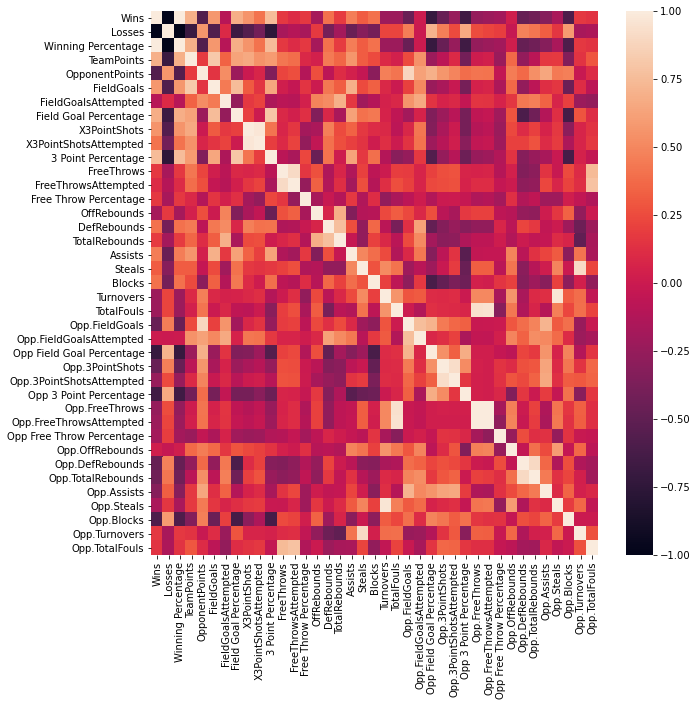

In [170]:
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix)

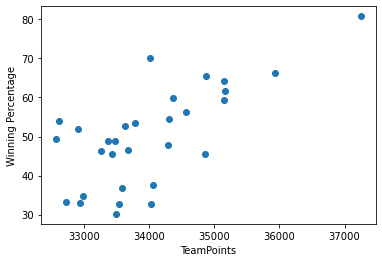

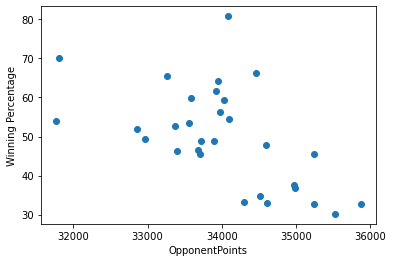

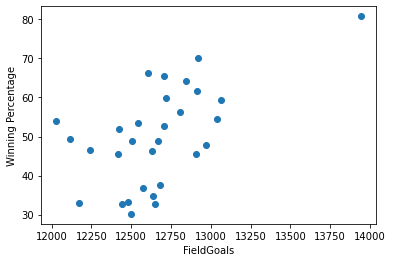

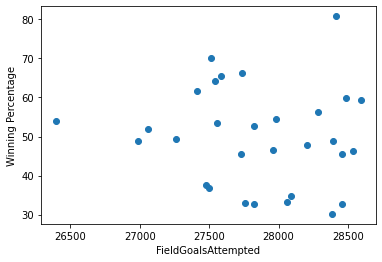

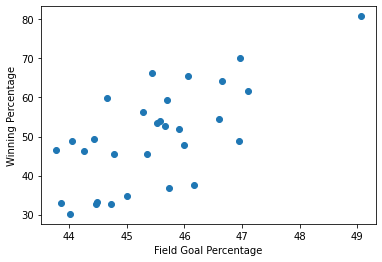

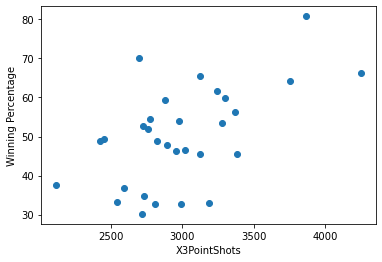

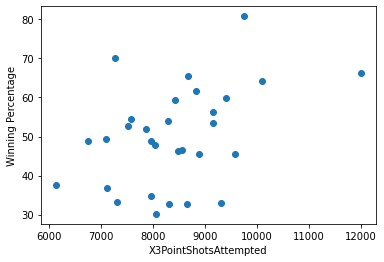

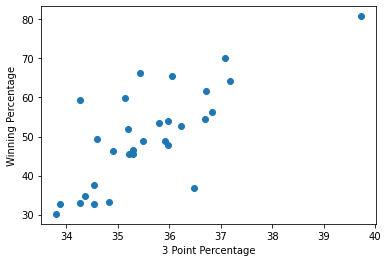

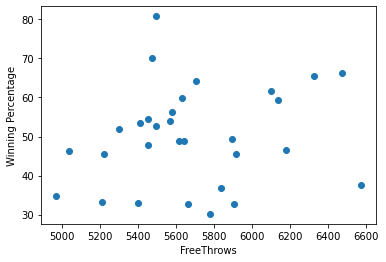

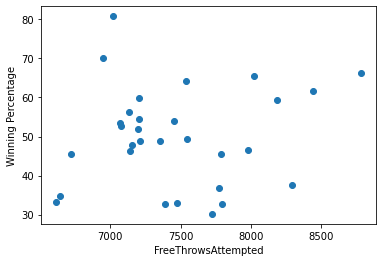

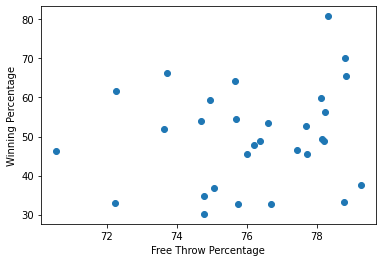

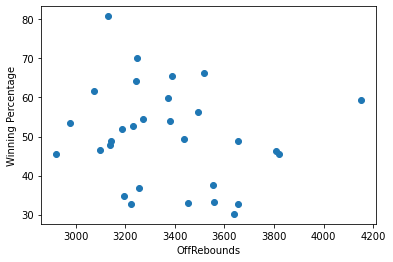

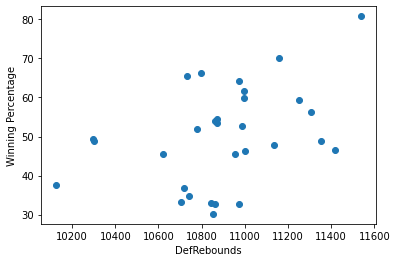

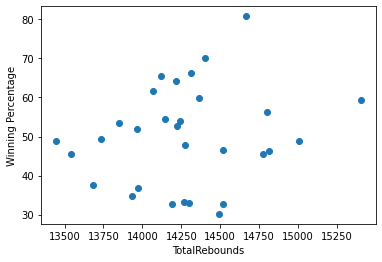

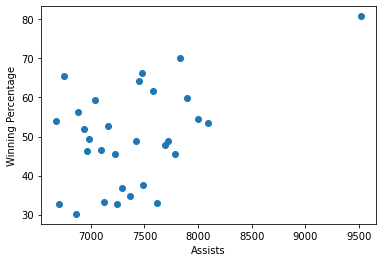

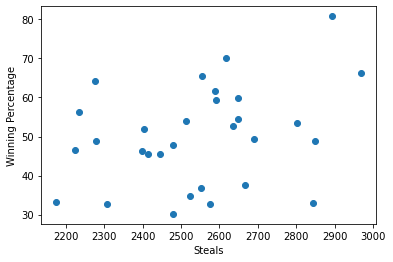

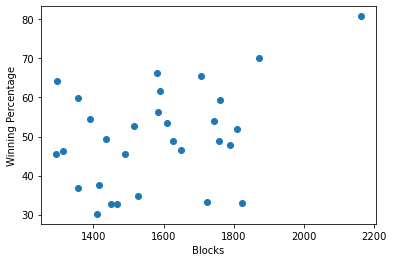

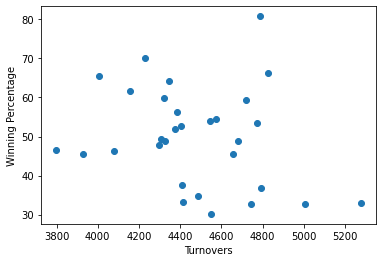

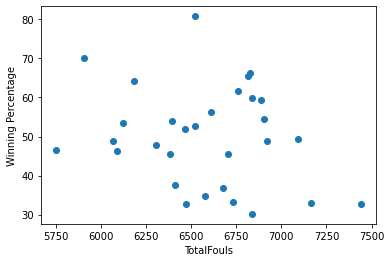

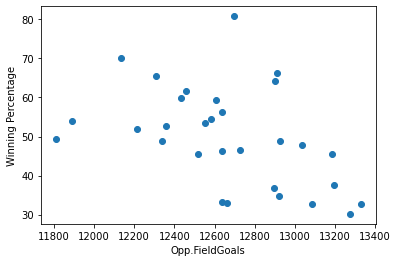

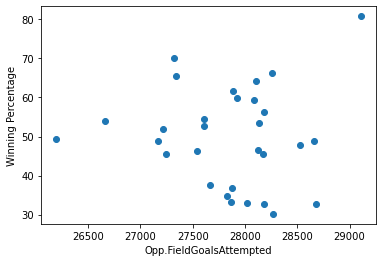

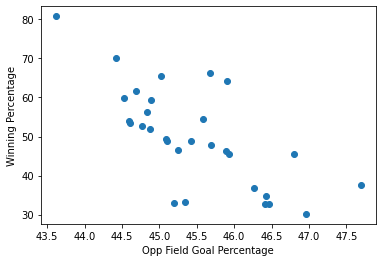

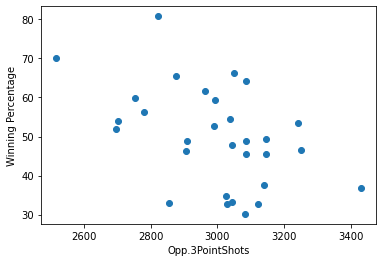

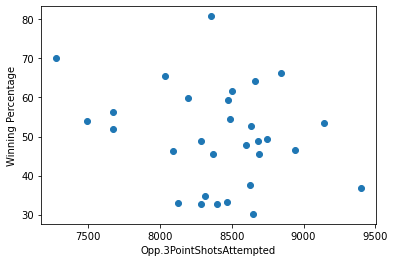

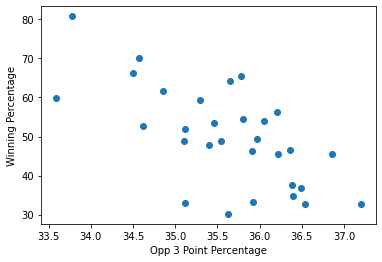

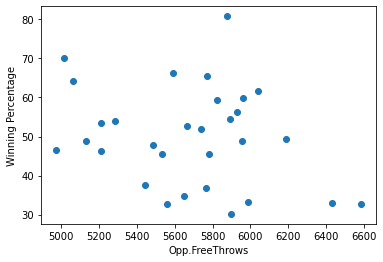

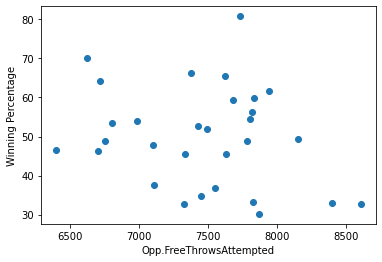

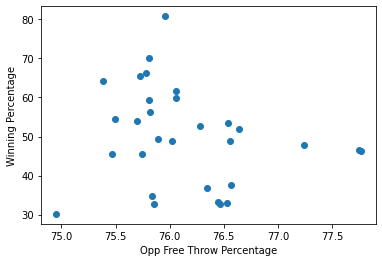

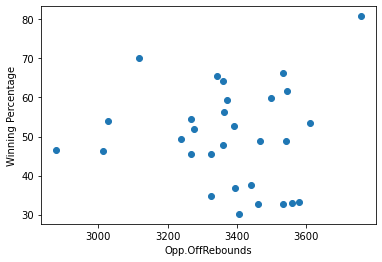

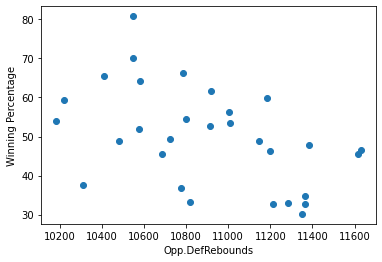

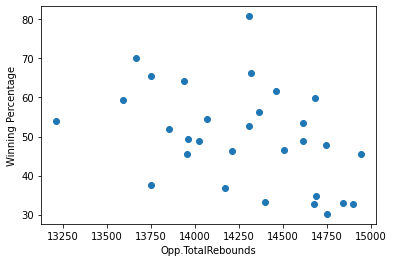

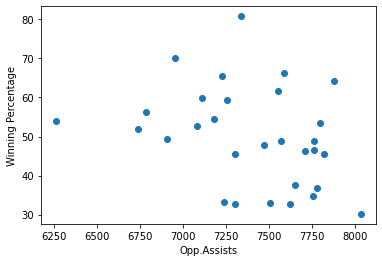

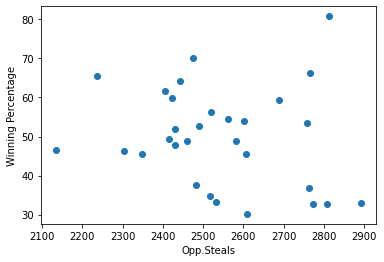

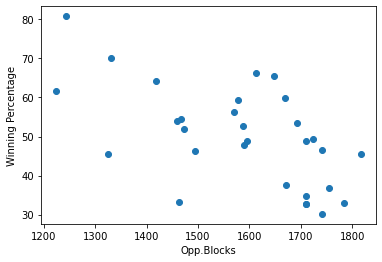

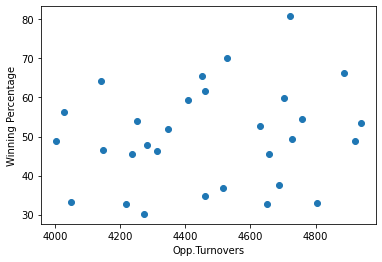

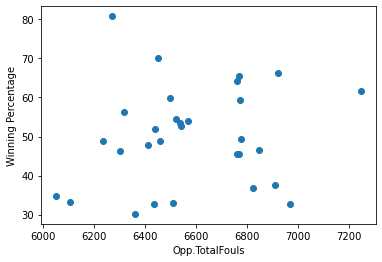

In [171]:
for col in dfNBA.iloc[:, 3:]:
    plt.scatter(dfNBA[col], dfNBA['Winning Percentage'])
    plt.xlabel(col)
    plt.ylabel("Winning Percentage")
    plt.show()

## Plans for Statistical Model

I plan to use a linear regression model that will take Winning Percentage as the dependent Y variable, and game stats as the independent X variables.  This method should model Win Rate as a function of all other statistical categories, especially 3 Point Percentage.  This will hopefully allow me to calculate conditional expectation values for win totals in the NBA.  Based on the correlative data I have accumulated, I believe 3 Point Shooting will provide the model that best fits the training data.  It should further prove what my EDA has already shown, that 3 Point Shooting Percentage is the best predictor of an NBA team's chances of winning.